![](airbnb.jpg)

I will be carrying out an explanatory analysis on the Airbnb data set. The aim of the analysis is not only to understand the data set better but also answer some of the questions below:
    
1. What type of rooms were listed in different neighbourhoods?

2. What are the prices of rooms in different neighbourhoods?

3. Availability for different rooms in different areas?

4. What areas tend to get the most reviews? 

In [12]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('AB_NYC_2019.csv')

In [25]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
#data
data.shape

(48895, 16)

# Missing value

In [27]:
#missing value
data.isnull().sum().div(data.count())


id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000430
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.258785
reviews_per_month                 0.258785
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

I'm going to fill in the missing values:

- filling the missing names and host_name with 'house' and 'Avg Man', as these are irrelevant columns

- filling the missing last_review with random date '2022-11-11'

- filling the missing review_per_month with the mean values of the column

In [28]:
#Name and Host
data['name'] = data.name.fillna('House')
data['host_name'] = data.host_name.fillna('Avg Man')
#last_review and reviews_per_month
data['last_review'] = data.last_review.fillna('2022-11-11')
data['reviews_per_month'] = data.reviews_per_month.fillna(np.mean(data['reviews_per_month']))

# Outliers

Text(0.5, 0, 'Prices')

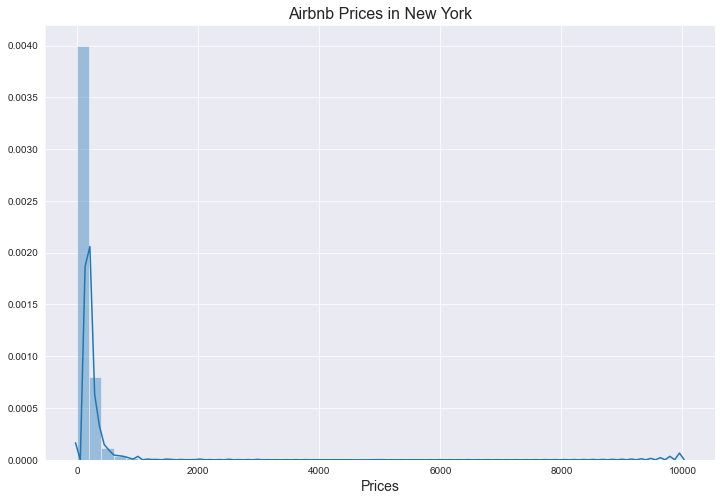

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.distplot(data.price)
plt.title('Airbnb Prices in New York',fontsize=16)
plt.xlabel('Prices',fontsize=14)

Text(0.5, 0, 'Prices')

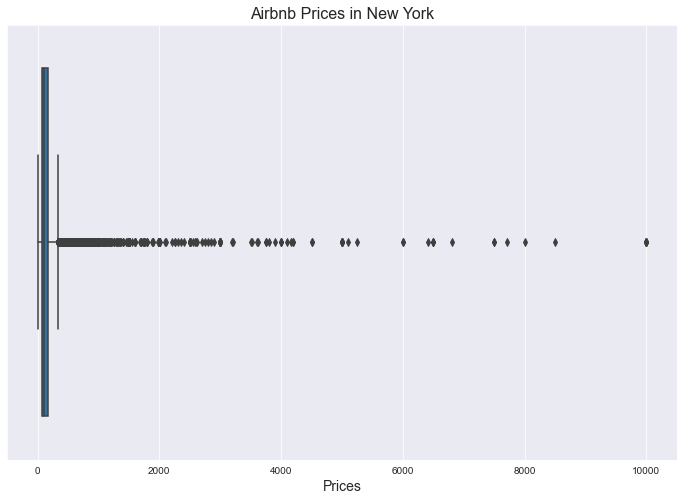

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.boxplot(data['price'])
plt.title('Airbnb Prices in New York',fontsize=16)
plt.xlabel('Prices',fontsize=14)

we can see that there are alot of outliers in the dataset as the airbnb prices are skewed to right hand side.

- Calculating the Inter Quartile Range

- Upper and Lower Quartile

## Use the following method to remove outliers


In [31]:
IQR = data.price.quantile(0.75) - data.price.quantile(0.25)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)

In [32]:
new_data = data[(data['price'] >= (Q1 - 1.5 * IQR)) & (data['price'] <= (Q3 + 1.5 * IQR))]

In [33]:
print('After Removing Outliers :',new_data.shape)

After Removing Outliers : (45923, 16)


Text(0.5, 1.0, 'Distribution of Airbnb Prices without Outliers')

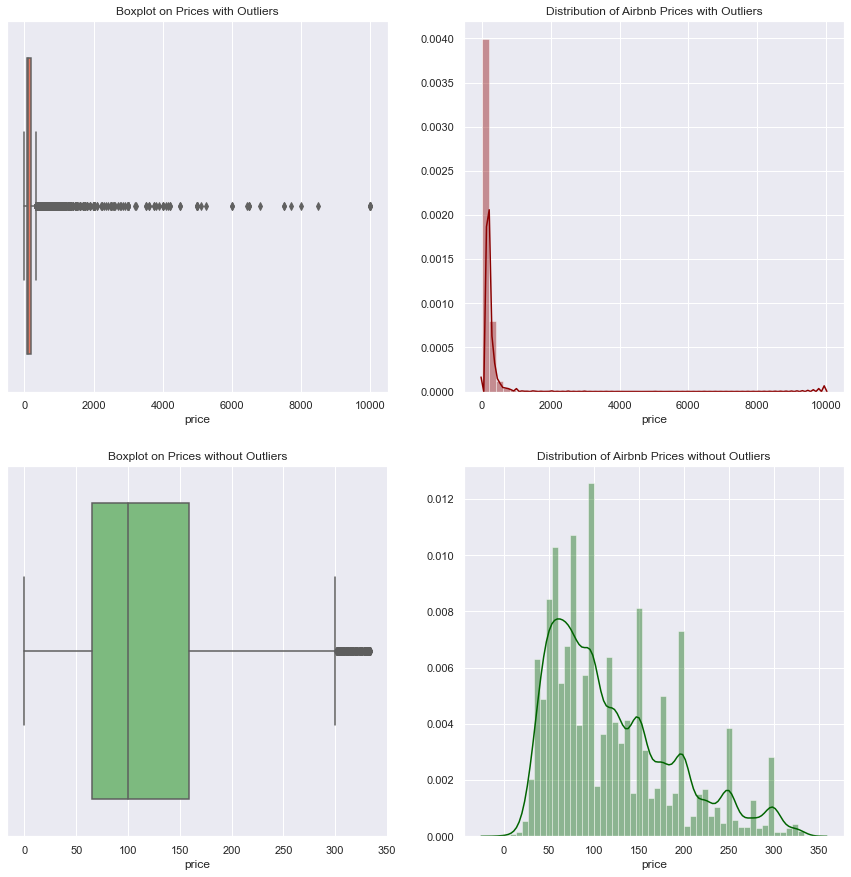

In [37]:
sns.set(style="darkgrid")
#sns.set_context('poster')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig,ax=plt.subplots(2,2,figsize=(15,15),squeeze=False)
sns.boxplot(data.price,ax=ax[0][0], palette='Reds')
sns.distplot(data.price,ax=ax[0][1], color='darkred')
sns.boxplot(new_data.price,ax=ax[1][0], palette='Greens')
sns.distplot(new_data.price,ax=ax[1][1], color='darkgreen')

ax[0][0].set_title('Boxplot on Prices with Outliers')
ax[0][1].set_title('Distribution of Airbnb Prices with Outliers')
ax[1][0].set_title('Boxplot on Prices without Outliers')
ax[1][1].set_title('Distribution of Airbnb Prices without Outliers')

# EDA

1. What type of rooms were listed in different neighbourhoods?

In [92]:
new_data.room_type.value_counts()

Entire home/apt    22789
Private room       21996
Shared room         1138
Name: room_type, dtype: int64

In [95]:
new_data.groupby('room_type')['neighbourhood_group'].value_counts()

room_type        neighbourhood_group
Entire home/apt  Manhattan              11294
                 Brooklyn                8942
                 Queens                  2022
                 Bronx                    363
                 Staten Island            168
Private room     Brooklyn               10062
                 Manhattan               7747
                 Queens                  3351
                 Bronx                    648
                 Staten Island            188
Shared room      Manhattan                465
                 Brooklyn                 411
                 Queens                   194
                 Bronx                     59
                 Staten Island              9
Name: neighbourhood_group, dtype: int64

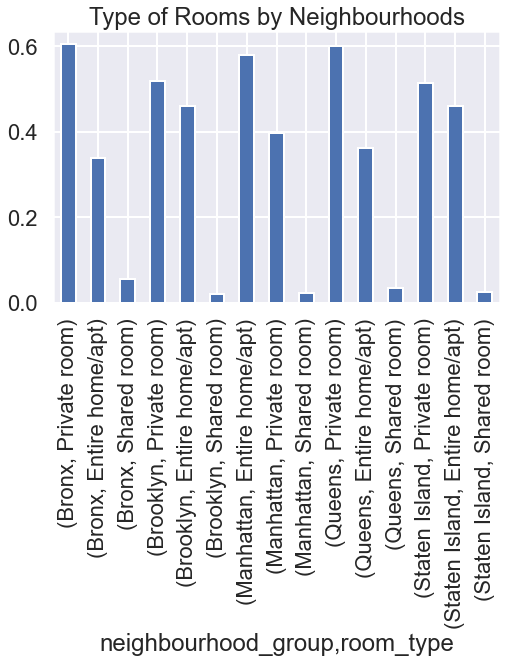

In [47]:
plt.figure(figsize=(8,5))
sns.set_context('poster')
new_data.groupby('neighbourhood_group')['room_type'].value_counts(normalize=True)
new_data.groupby('neighbourhood_group')['room_type'].value_counts(normalize=True).plot(kind='bar',title='Type of Rooms by Neighbourhoods')

Private Room and Home/apt are the most popular across the neighbourhoods.

# Maps

Text(0.5, 0, 'Longitude')

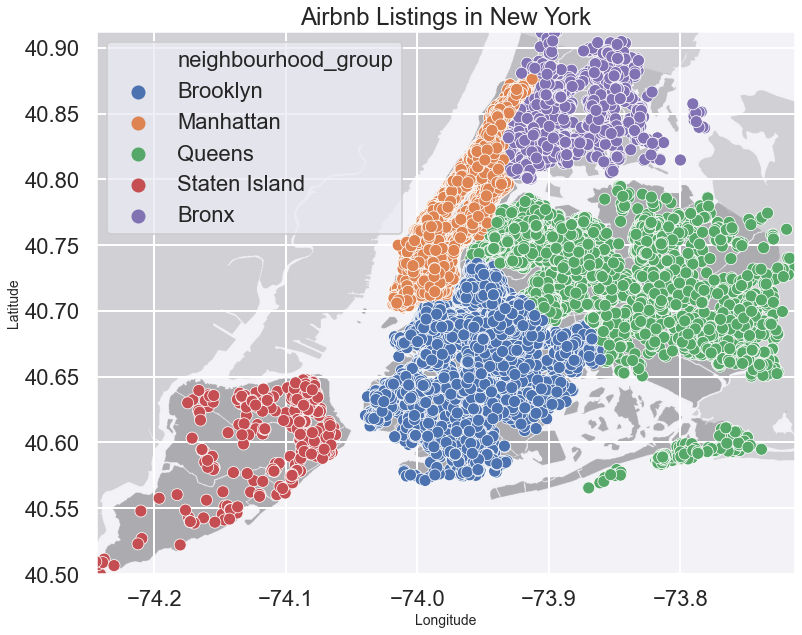

In [55]:
import matplotlib.image as mpimg
NewYork_img=mpimg.imread('NewYork.png', 0)
sns.set_context('poster')
plt.figure(figsize=(15,10))
ax =sns.scatterplot(new_data.longitude,new_data.latitude, hue=new_data.neighbourhood_group)
plt.imshow(NewYork_img,extent=[-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994], alpha=0.5)
plt.title("Airbnb Listings in New York")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

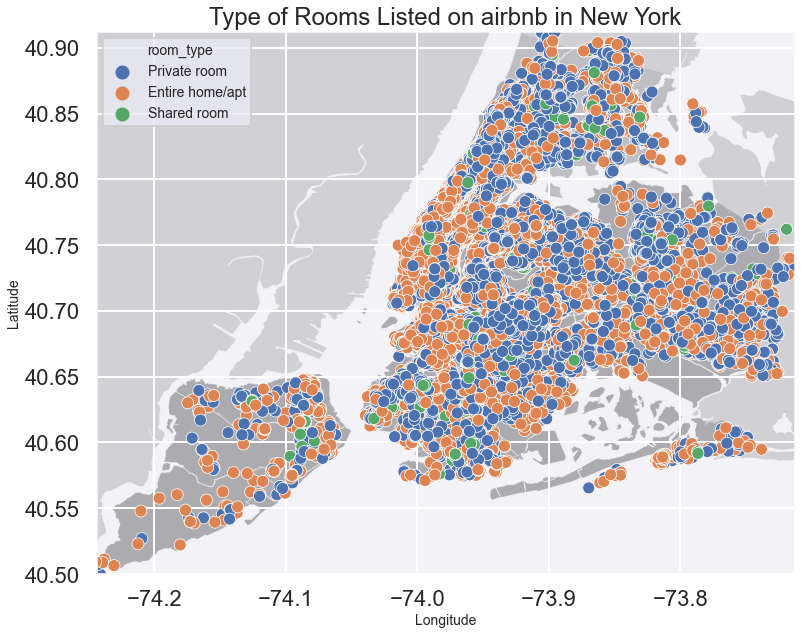

In [65]:
import matplotlib.image as mpimg
NewYork_img=mpimg.imread('NewYork.png', 0)
sns.set_context('poster')

plt.figure(figsize=(15,10))
ax =sns.scatterplot(new_data.longitude,new_data.latitude, hue=new_data.room_type)
plt.imshow(NewYork_img,extent=[-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994], alpha=0.5)
plt.title("Type of Rooms Listed on airbnb in New York")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=14)

Manhattan has the most listing on Airbnb

60% of listings are Entire Home/apt in Manhattan whereas in Bronx, Brooklyn, and Queens 50% of the listings are private homes

This suggests more houses are vacant in manhattan compare to other areas.

# Prices

2. What are the prices of rooms in different neighbourhoods?

In [66]:
new_data.price.describe()

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

Text(0.5, 0, 'Neighbourhood')

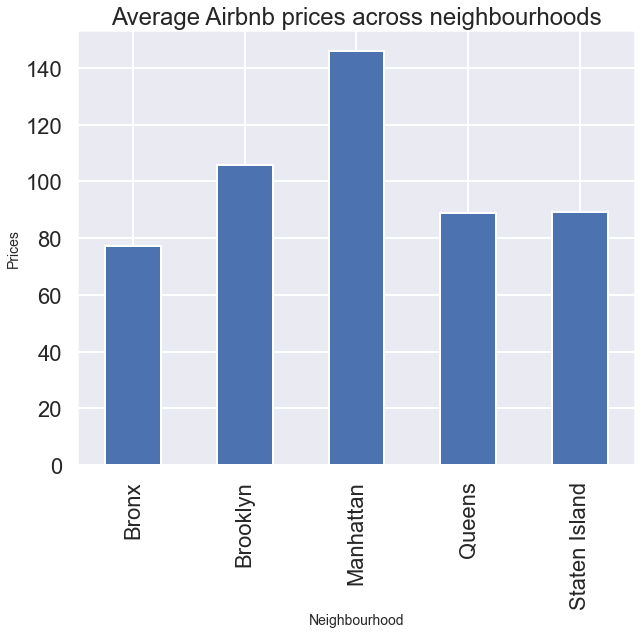

In [69]:
plt.figure(figsize=(10,8))
new_data.groupby('neighbourhood_group')['price'].mean().plot(kind='bar',title='Average Airbnb prices across neighbourhoods')
plt.ylabel("Prices", fontsize=14)
plt.xlabel("Neighbourhood", fontsize=14)

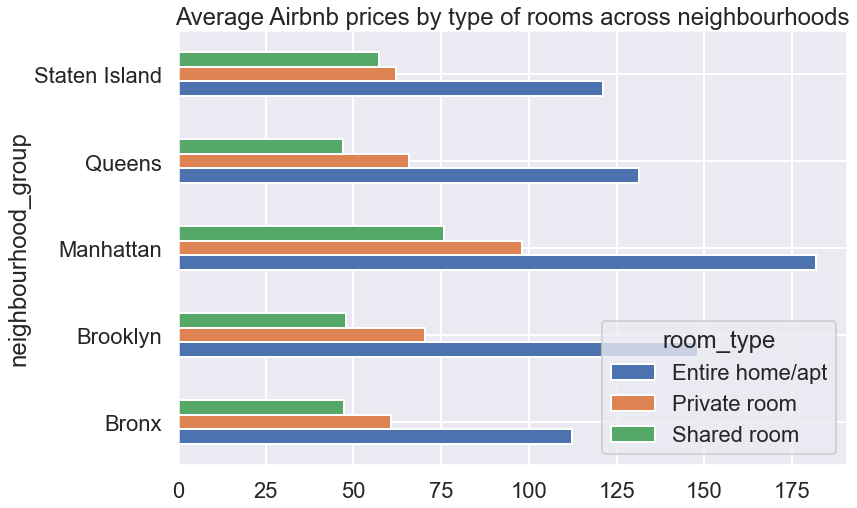

In [75]:
prices = pd.pivot_table(new_data,index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean').plot(kind='barh',title='Average Airbnb prices by type of rooms across neighbourhoods',figsize=(12,8))

Prices in Manhattan is clearly more expensive and It has a huge demand

It is interesting to see private and shared rooms have similar prices for their particular areas (Staten Island, Queens, and the Bronx). This could also be biased as there are fewer shared listing across neighbourhoods.

# Availability

Listing availability for different rooms in different areas?

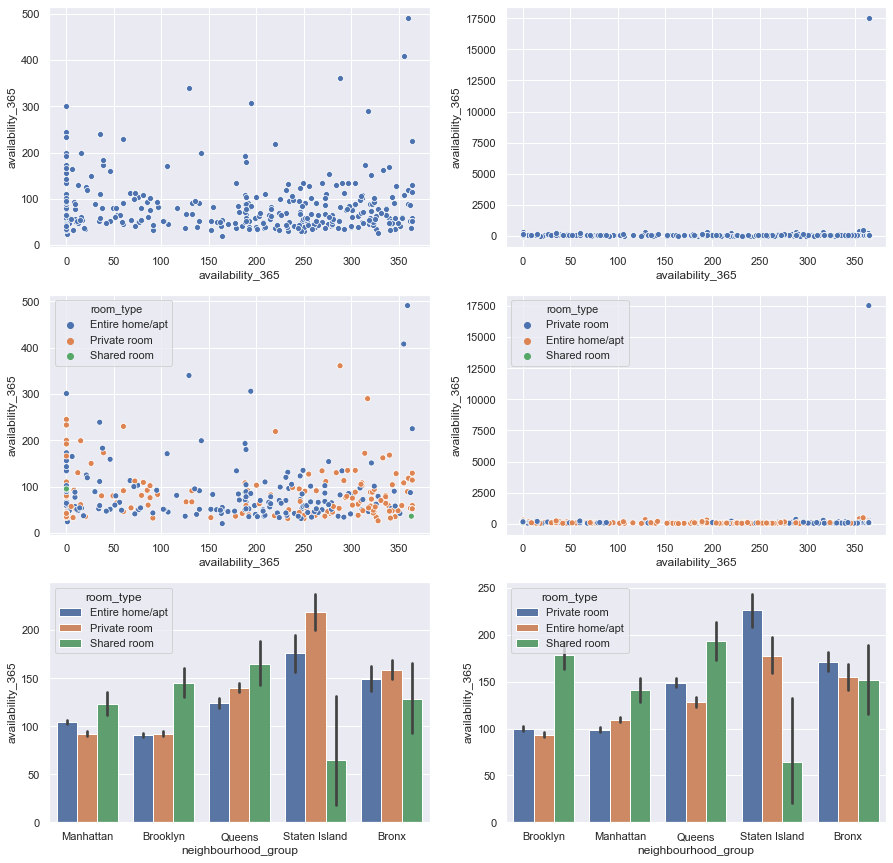

In [76]:
sns.set(style="darkgrid")
#number of days when listing is available for booking
fig,ax=plt.subplots(3,2,figsize=(15,15))
ava = new_data[new_data['availability_365']<365]
sns.scatterplot(x='availability_365',y=data.availability_365.value_counts(),data=ava,ax=ax[0][0])
sns.scatterplot(x='availability_365',y=data.availability_365.value_counts(),data=new_data,ax=ax[0][1])
sns.scatterplot(x='availability_365',y=data.availability_365.value_counts(),hue='room_type',data=ava,ax=ax[1][0])
sns.scatterplot(x='availability_365',y=data.availability_365.value_counts(),hue='room_type',data=new_data,ax=ax[1][1])
sns.barplot(x='neighbourhood_group',y=data['availability_365'],hue='room_type',data=ava,ax=ax[2][0])
sns.barplot(x='neighbourhood_group',y=data['availability_365'],hue='room_type',data=new_data,ax=ax[2][1])

In [77]:
ava = pd.pivot_table(new_data,index='neighbourhood_group',columns='room_type',values='availability_365',aggfunc='mean')

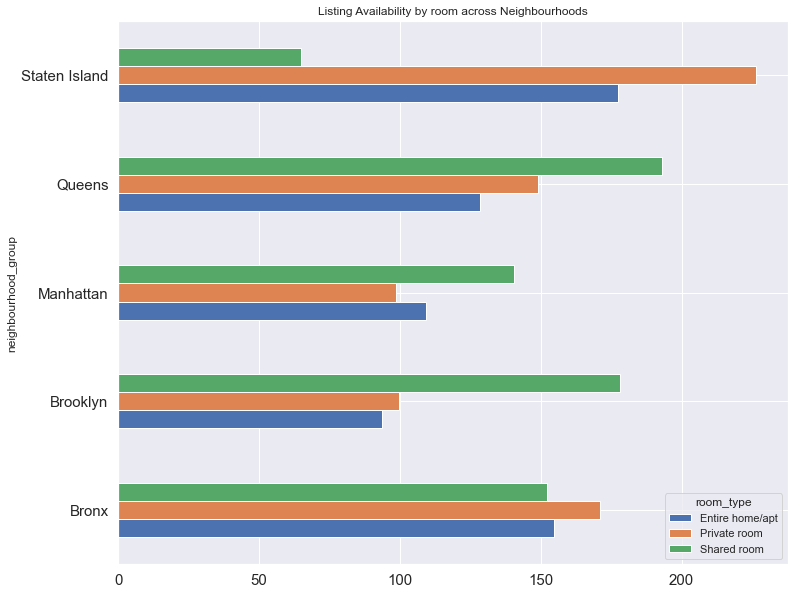

In [81]:
ava.plot(kind='barh',figsize=(12,10),title ='Listing Availability by room across Neighbourhoods',fontsize=15)

Text(0.5, 1.0, 'Availability by room across Neighbourhoods')

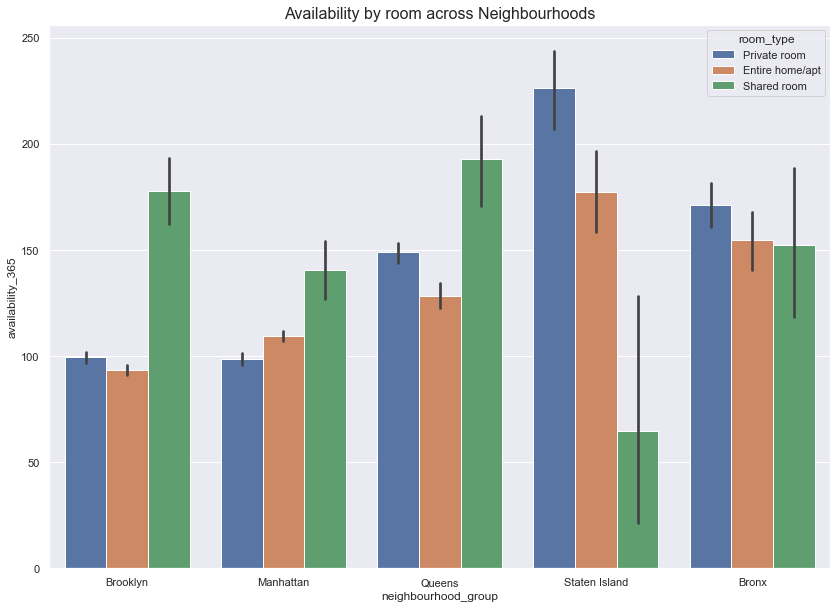

In [105]:
plt.figure(figsize=(14,10))
sns.barplot(x='neighbourhood_group',y=data['availability_365'],hue='room_type',data=new_data)
plt.title('Availability by room across Neighbourhoods',fontsize=16)

The number of days when the listing is available for booking is much lower for Manhattan then Staten Island. This could suggest in Manhattan people are rent out the entire home for half of the year.

# Reviews

4. What areas tend to get the most reviews? 

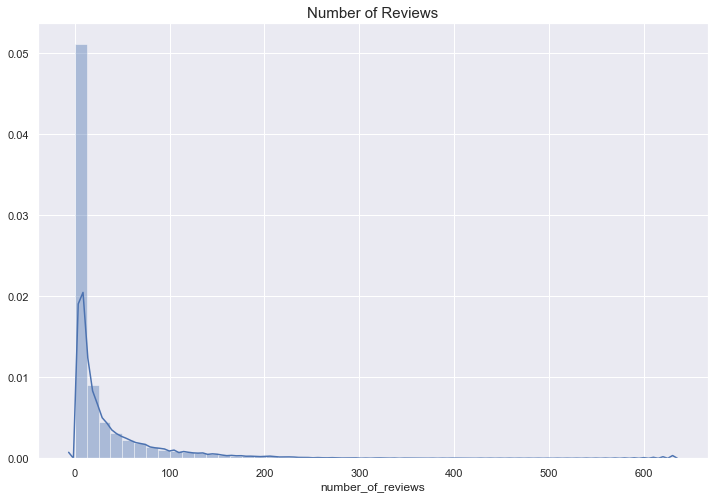

In [87]:
plt.figure(figsize=(12,8))
plt.title('Number of Reviews',fontsize=15)
sns.distplot(new_data.number_of_reviews)

In [88]:
rev_100 = new_data[new_data['number_of_reviews']<=50]
rev_over_100= new_data[new_data['number_of_reviews']>100]
grade_bath = ['room_type', 'number_of_reviews']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(new_data[grade_bath[0]], new_data[grade_bath[1]]).style.background_gradient(cmap = cm)

In [89]:
rev_100 = new_data[new_data['number_of_reviews']<=50]
rev_over_100= new_data[new_data['number_of_reviews']>100]
grade_bath = ['neighbourhood_group', 'number_of_reviews']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(new_data[grade_bath[0]], new_data[grade_bath[1]]).style.background_gradient(cmap = cm)

Home and Private rooms tend to get the most reviews and the majority of these rooms are based in Manhattan and Queens.

In [101]:
new_data.to_csv('clean_data.csv')